# Инфраструктура Python. Графы

Библиотека `networkx` (входящая в Anaconda) умеет почти все, что можно сделать с графами. Для визуализации ей еще следует поставить программу `graphviz` http://www.graphviz.org/Download_windows.php и библиотеку `pydotplus`. Также может пригодиться программа Gephi https://gephi.org/ .

```
pip instlal pydotplus
pip install pygraphviz
```

In [1]:
%pylab inline
import networkx, IPython, itertools, delegator
from io import BytesIO
import PIL

Populating the interactive namespace from numpy and matplotlib


## Создание графов

Графы в `networkx` можно задавать вызовами `add_edge`,

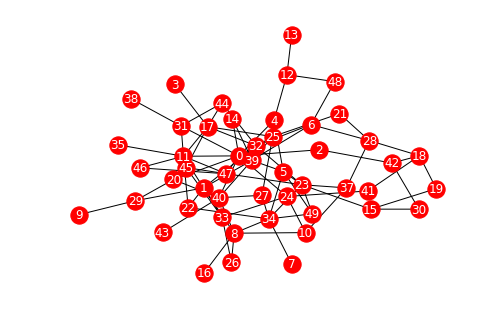

In [2]:
G = networkx.Graph()
v1 = [21,4,14,0,31,46,1,34,2,3,27,19,47,46,17,11,41,12,31,0,34,18,8,14,23,40,0,18,48,35,42,24,25,32,25,44,17,6,44,34,12,39,43,39,26,34,10,6,13,2,40,15,16,32,32,29,1,23,8,10,49,22,10,15,40,20,0,30,1,43,33,42,28,39,28,4,38,11,5,1,47,12,0,22,20,33,33,34,18,8,23,6]
v2 = [25,5,39,20,44,47,11,49,42,17,25,15,23,11,32,17,24,4,11,47,27,41,40,0,49,27,5,28,6,11,18,0,17,1,0,32,45,28,17,5,13,40,40,25,33,7,8,32,12,0,39,30,8,39,23,9,8,34,34,37,5,1,24,23,0,29,11,42,29,40,24,18,37,1,21,0,31,47,23,33,45,48,31,11,40,45,24,22,19,26,37,39]
for i in range(len(v1)):
    G.add_edge(v1[i], v2[i])
# или g.add_edges_from(zip(v1, v2))
pos=networkx.nx_pydot.graphviz_layout(G)
networkx.draw(G, pos, with_labels=True, font_color='w')

из списка смежности,

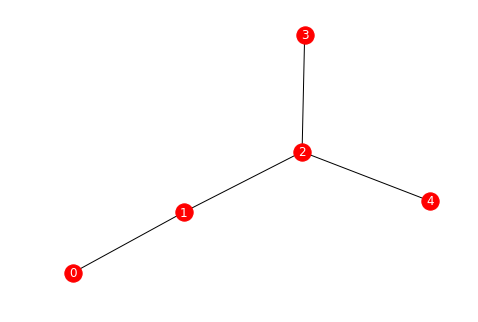

In [3]:
G = networkx.from_edgelist([(0, 1), (1, 2), (2, 3), (2, 4)])
networkx.draw(G, pos=networkx.nx_pydot.graphviz_layout(G), with_labels=True, font_color='w')

из словаря смежности,

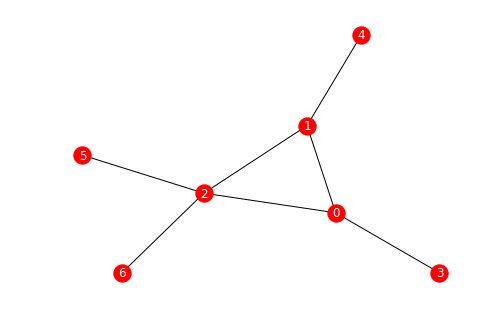

In [4]:
G = networkx.from_dict_of_lists({0: [1, 2, 3], 1: [2, 4], 2: [5, 6]})
networkx.draw(G, with_labels=True, font_color='w')

из матрицы смежности.

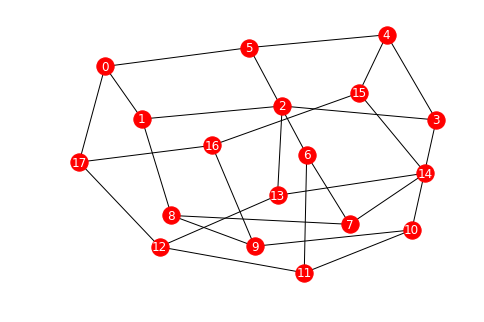

In [5]:
G = networkx.from_numpy_array(array(
[[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]]))
networkx.draw(G, pos=networkx.nx_pydot.graphviz_layout(G), with_labels=True, font_color='w')

Библиотека `networkx` знает ряд именованых графов, умеет строить сетки, полные графы

In [6]:
def trydefault(fn, default=None):
    try:
        return fn()
    except:
        return default

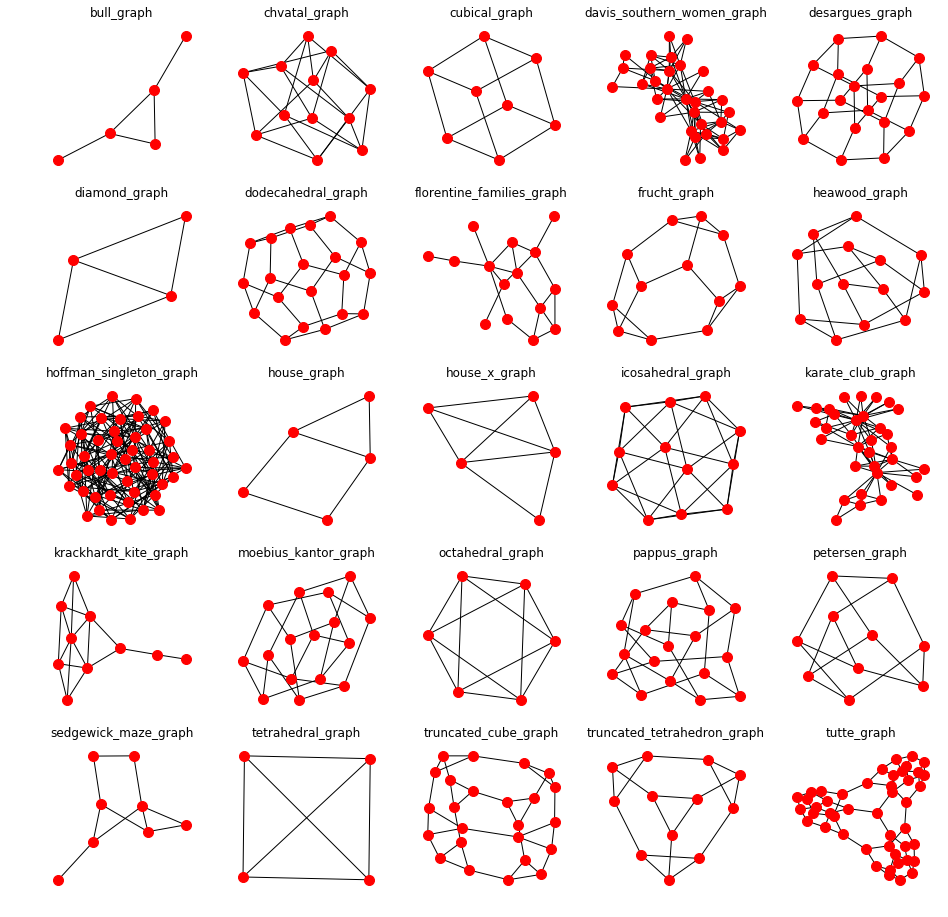

In [7]:
named_graphs = {k: v() for k, v in networkx.__dict__.items()
    if k.endswith('_graph') and trydefault(v) and v().number_of_nodes() > 1}
figure(figsize=(16,16))
for i, (k, v) in enumerate(sorted(named_graphs.items())):
    subplot(5, (len(named_graphs) + 5 - 1) / 5, i + 1)
    title(k)
    networkx.draw(v, node_size=100)

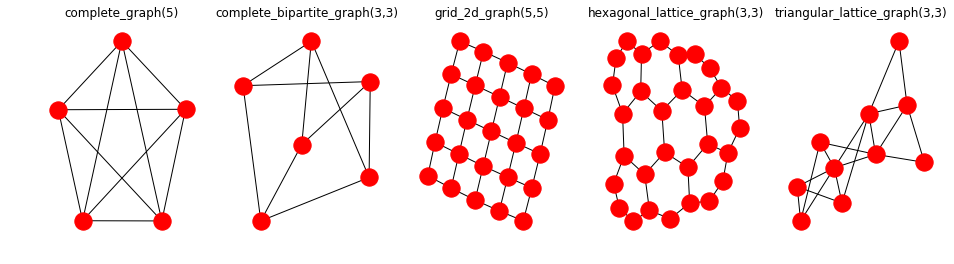

In [8]:
figure(figsize=(16, 4))
subplot(151)
title('complete_graph(5)')
G = networkx.complete_graph(5)
networkx.draw(G)

subplot(152)
title('complete_bipartite_graph(3,3)')
G = networkx.complete_bipartite_graph(3, 3)
networkx.draw(G)

subplot(153)
title('grid_2d_graph(5,5)')
G = networkx.grid_2d_graph(5, 5)
networkx.draw(G, pos=networkx.nx_pydot.graphviz_layout(G))

subplot(154)
title('hexagonal_lattice_graph(3,3)')
G = networkx.hexagonal_lattice_graph(3, 3)
networkx.draw(G, pos=networkx.nx_pydot.graphviz_layout(G, prog='sfdp'))

subplot(155)
title('triangular_lattice_graph(3,3)')
G = networkx.triangular_lattice_graph(3, 3)
networkx.draw(G)

Умеет строить деревья по коду Прюфера

[0, 0, 1, 2, 3, 1, 1, 2, 3, 1]


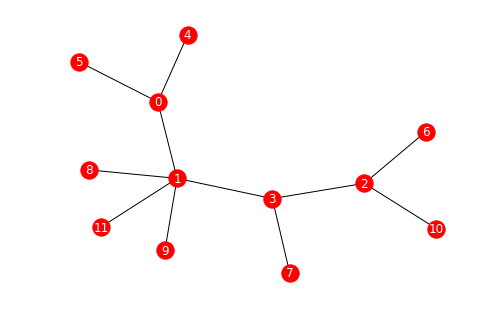

In [9]:
tree = networkx.algorithms.tree.coding.from_prufer_sequence([0,0,1,2,3,1,1,2,3,1])
print networkx.algorithms.tree.coding.to_prufer_sequence(tree)
networkx.draw(tree, pos=networkx.nx_pydot.graphviz_layout(tree), with_labels=True, node_color='r', font_color='w')

Умеет перечислять неизоморфные деревья (существенно быстрее, чем с проверкой `networkx.is_isomorphic`)

Isomeres count: 35


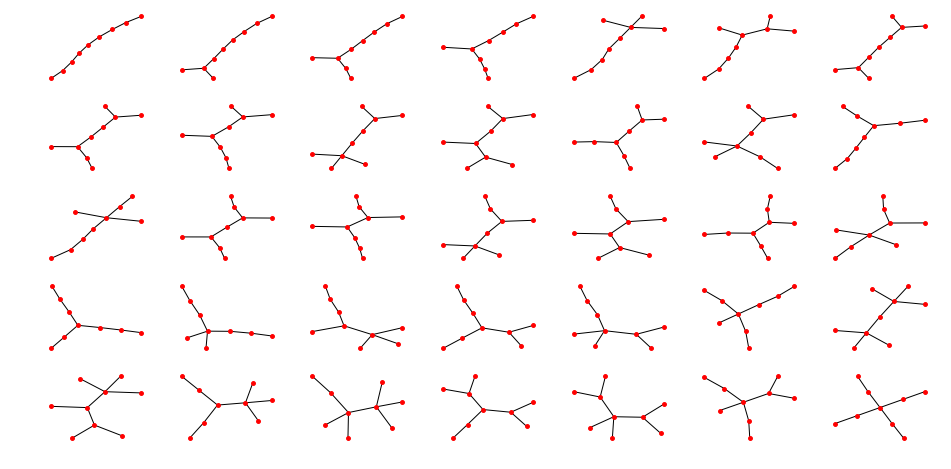

In [10]:
figure(figsize=(16,8))
nonanes = [nonane for nonane in networkx.nonisomorphic_trees(9) if max(dict(nonane.degree()).values()) <= 4]
for i, nonane in enumerate(nonanes):
    subplot(5, 7, i + 1)
    networkx.draw(nonane, pos=networkx.nx_pydot.graphviz_layout(nonane), node_size=15)
print 'Isomeres count:', len(nonanes)

## Свойства графов

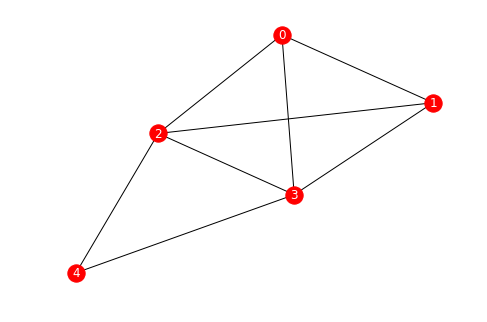

In [11]:
G = networkx.house_x_graph()
networkx.draw(G, with_labels=True, font_color='w')

In [12]:
print G.number_of_edges(), G.edges()
print G.number_of_nodes(), G.nodes()

8 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
5 [0, 1, 2, 3, 4]


In [13]:
print G.degree()

[(0, 3), (1, 3), (2, 4), (3, 4), (4, 2)]


In [14]:
print G.has_edge(1, 4)
print list(G.neighbors(1))
print list(networkx.common_neighbors(G, 1, 4))

False
[0, 2, 3]
[2, 3]


In [15]:
print networkx.adjacency_matrix(G).todense()

[[0 1 1 1 0]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [0 0 1 1 0]]


In [16]:
laplacian = networkx.laplacian_matrix(G).todense()
print laplacian
print 'Число остовных деревьев по теореме Кирхгофа', det(laplacian[1:,1:])

[[ 3 -1 -1 -1  0]
 [-1  3 -1 -1  0]
 [-1 -1  4 -1 -1]
 [-1 -1 -1  4 -1]
 [ 0  0 -1 -1  2]]
Число остовных деревьев по теореме Кирхгофа 40.0


## Отображение графов

Можно отображать графы либо встроенным способом (`networkx.draw`), либо через `graphviz` (разными методами в каждом). `DiGraph` это орграф.

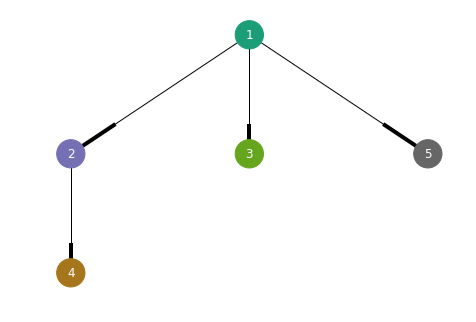

In [17]:
G = networkx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

G.add_edge(1,2, color='red')
G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(1,5)

pos=networkx.nx_pydot.graphviz_layout(G, prog='dot')
networkx.draw(G, pos, node_size=800, with_labels=True, font_color='w', cmap='Dark2', node_color=range(len(G)))

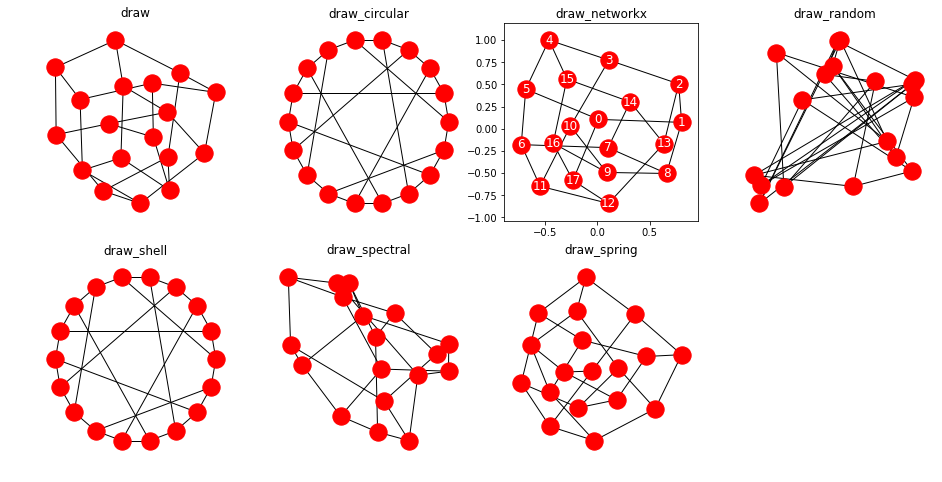

In [18]:
G = networkx.pappus_graph()
figure(figsize=(16,8))
subplot(241); title('draw'); networkx.draw(G)
subplot(242); title('draw_circular'); networkx.draw_circular(G)
subplot(243); title('draw_networkx'); networkx.draw_networkx(G, font_color='w')
subplot(244); title('draw_random'); networkx.draw_random(G)
subplot(245); title('draw_shell'); networkx.draw_shell(G)
subplot(246); title('draw_spectral'); networkx.draw_spectral(G)
subplot(247); title('draw_spring'); networkx.draw_spring(G)

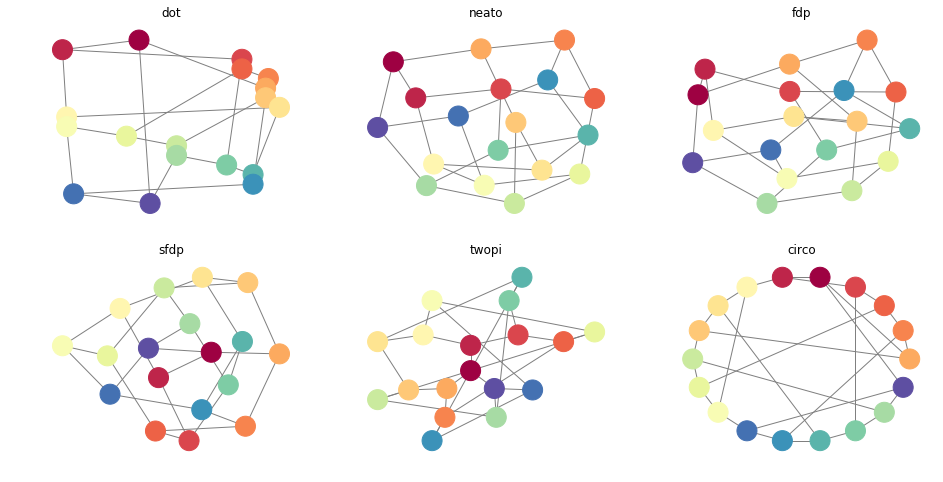

In [19]:
figure(figsize=(16,8))
for i, prog in enumerate('dot neato fdp sfdp twopi circo'.split()):
    subplot(2, 3, i + 1)
    title(prog)
    networkx.draw(
        G, pos=networkx.nx_pydot.graphviz_layout(G, prog=prog),
        node_size=400, cmap=cm.Spectral, node_color=range(len(G)), edge_color='gray'
    )

Отрисовка графов собственно `graphviz`, со всеми возможностями Dot Language, возможна через класс `AGraph` библиотеки `pygraphviz`. К ребрам и вершинам графов можно добавлять атрибуты, управляющие отображением, например:

* и вершины, и ребра: `label`, `style`, `color`, `fontcolor`, `fontname`, `fontsize`
* вершины: `shape`, `fillcolor`
* ребра: `headlabel`, `taillabel`, `penwidth`, `arrowhead`

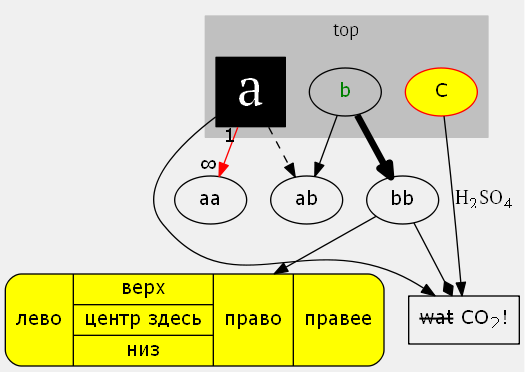

In [20]:
G = networkx.DiGraph()

G.add_node('a', shape='square', style='filled', fillcolor='black', fontcolor='white', fontname='PT Serif', fontsize=40)
G.add_node('b', fontcolor='#008000', fontname='Verdana')
G.add_node('C', fillcolor='yellow', style='filled', color='red')
G.add_node('bba', shape='record', style='rounded,filled', fillcolor='yellow',
           label = u' лево |{ верх | центр здесь | низ }| право | правее')
G.add_node('bbc', label=u'<<s>wat</s> CO<sub>2</sub>!>', shape='rect')

G.add_edge('a', 'aa', color='red', headlabel='&infin;', taillabel='1')
G.add_edge('a', 'ab', style='dashed')
G.add_edge('a', 'bbc')
G.add_edge('b', 'ab')
G.add_edge('b', 'bb', penwidth=5)
G.add_edge('C', 'bbc', label='<H<sub>2</sub>SO<sub>4</sub>>', fontname='PT Serif')
G.add_edge('bb', 'bba')
G.add_edge('bb', 'bbc', arrowhead='diamond')

A = networkx.nx_agraph.to_agraph(G)
A.graph_attr['bgcolor'] = '#F0F0F0'
# A.node_attr и A.edge_attr действуют только на вершины и ребра ниже
for node in A.nodes():
    if not node.attr['fontname']:
        node.attr['fontname'] = 'Verdana'
for edge in A.edges():
    if not edge.attr['fontname']:
        edge.attr['fontname'] = 'Verdana'

# Для отрисовки подграфа name должен начинаться с cluster
A.add_subgraph(['a', 'b', 'C'], rank='same',
    name='cluster0', label='top', shape='none', style='filled', color='gray', fontname='PT Sans')
A.add_subgraph(['aa', 'ab', 'bb'], rank='same')
A.add_subgraph(['bba', 'bbc'], rank='same')

io = BytesIO()
A.draw(io, format='png', prog='dot')
PIL.Image.open(io)

## Экспорт-импорт графов

Обмен графами происходит обычно в формате программы `graphviz` — Dot Language https://www.graphviz.org/gallery/. Его можно записать в файл и отрендерить из командной строки.

In [21]:
print networkx.nx_pydot.to_pydot(tree).to_string()

strict graph  {
0;
1;
2;
3;
4;
5;
6;
7;
8;
9;
10;
11;
0 -- 1;
0 -- 4;
0 -- 5;
1 -- 8;
1 -- 3;
1 -- 11;
1 -- 9;
2 -- 10;
2 -- 3;
2 -- 6;
3 -- 7;
}



Дефолтный формат Gephi — основанный на XML формат GEXF

In [22]:
io = BytesIO()
networkx.write_gexf(tree, io)
print io.getvalue()

<?xml version='1.0' encoding='utf-8'?>
<gexf version="1.2" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">
  <graph defaultedgetype="undirected" mode="static" name="">
    <meta>
      <creator>NetworkX 2.0</creator>
      <lastmodified>06/06/2018</lastmodified>
    </meta>
    <nodes>
      <node id="0" label="0" />
      <node id="1" label="1" />
      <node id="2" label="2" />
      <node id="3" label="3" />
      <node id="4" label="4" />
      <node id="5" label="5" />
      <node id="6" label="6" />
      <node id="7" label="7" />
      <node id="8" label="8" />
      <node id="9" label="9" />
      <node id="10" label="10" />
      <node id="11" label="11" />
    </nodes>
    <edges>
      <edge id="0" source="0" target="1" />
      <edge id="1" source="0" target="4" />
      <edge id="2" source="0" target="5" />
      <edge id="3" source="1" target="8" />
      <edge id="4

Похож на него и GraphML

In [23]:
io = BytesIO()
networkx.write_graphml(tree, io)
print io.getvalue()

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="undirected"><node id="0"/>
<node id="1"/>
<node id="2"/>
<node id="3"/>
<node id="4"/>
<node id="5"/>
<node id="6"/>
<node id="7"/>
<node id="8"/>
<node id="9"/>
<node id="10"/>
<node id="11"/>
<edge source="0" target="1"/>
<edge source="0" target="4"/>
<edge source="0" target="5"/>
<edge source="1" target="8"/>
<edge source="1" target="3"/>
<edge source="1" target="11"/>
<edge source="1" target="9"/>
<edge source="2" target="10"/>
<edge source="2" target="3"/>
<edge source="2" target="6"/>
<edge source="3" target="7"/>
</graph></graphml>


## Алгоритмы

Библиотека `networkx` содержит почти все популярные алгоритмы над графами.

Поиск кратчайших путей

['a', 'b', 'c']
a -> b 0.5
b -> c 0.6


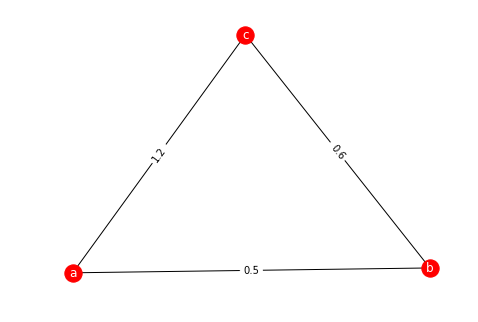

In [24]:
G = networkx.Graph()
#G.add_edge('a', 'b', weight=0.5)
#G.add_edge('b', 'c', weight=0.6)
#G.add_edge('a', 'c', weight=1.2)
G.add_weighted_edges_from([('a','b',0.5), ('b','c',0.6), ('a','c',1.2)])

pos = networkx.nx_pydot.graphviz_layout(G)

networkx.draw(G, pos, with_labels=True, node_color='r', font_color='w')
labels = networkx.get_edge_attributes(G, 'weight')
networkx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

path = networkx.dijkstra_path(G, 'a', 'c')
print path
for u, v in networkx.utils.pairwise(path):
    print u, '->', v, G[u][v]['weight']

In [25]:
G = networkx.pappus_graph()
pos = networkx.nx_pydot.graphviz_layout(G)
weights = {(v1, v2): hypot(pos[v1][0] - pos[v2][0], pos[v1][1] - pos[v2][1]) for v1, v2 in G.edges()}
networkx.set_edge_attributes(G, weights, 'weight')

print networkx.shortest_path(G, 0, 14, weight='weight'), networkx.shortest_path_length(G, 0, 14, weight='weight')
print networkx.single_source_shortest_path_length(G, 0)
print dict(networkx.all_pairs_shortest_path(G))[0][14]

[0, 5, 4, 15, 14] 332.423288929
{0: 0, 1: 1, 2: 2, 3: 3, 4: 2, 5: 1, 6: 2, 7: 3, 8: 2, 9: 3, 10: 4, 11: 3, 12: 2, 13: 3, 14: 4, 15: 3, 16: 2, 17: 1}
[0, 5, 6, 7, 14]


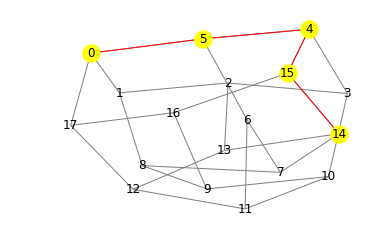

In [26]:
path = networkx.shortest_path(G, 0, 14, weight='weight')
SG = networkx.subgraph(G, path)

networkx.draw_networkx_edges(G, pos, edge_color='gray')
networkx.draw_networkx_labels(G, pos)
networkx.draw(SG, pos, node_color='yellow', edge_color='red');

Популярный алгоритм A`*`, ускоряющий поиск, если расстояния в графе не меньше расстояния по прямой между вершинами, реализован в методе `networkx.astar_path`. Минорирующее расстояние считается функцией, передаваемой в аргумент `heuristic=`.

Минимальное остовное дерево (MST)

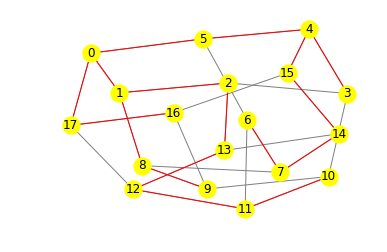

In [27]:
networkx.draw_networkx_edges(G, pos, edge_color='gray')
networkx.draw(networkx.minimum_spanning_tree(G), pos, node_color='yellow', edge_color='red')
networkx.draw_networkx_labels(G, pos);

Связные компоненты

[set([0, 1, 2]), set([3, 4, 5, 6]), set([8, 9, 7])]
[3, 3, 3]


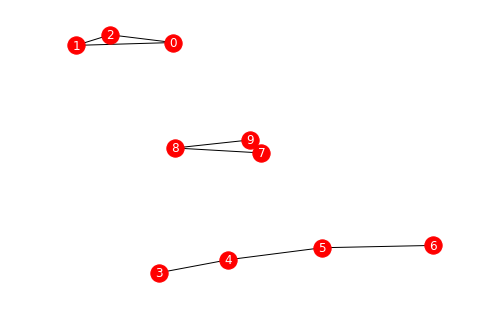

In [28]:
G = networkx.from_edgelist([(0,1), (1,2), (2,0), (3,4), (4,5), (5,6), (7,8), (8,9), (9,7)])
networkx.draw(G, with_labels=True, font_color='w')
print list(networkx.connected_components(G))
print [SG.number_of_edges() for SG in networkx.connected_component_subgraphs(G)]

Диаметр графа это $\max_{u,v \in V} \rho(u,v)$, радиус $\min_{u \in V} \max_{v \in V} \rho(u,v)$, центр — вершина(ы), где радиус достигается.

1 2 [2, 3]


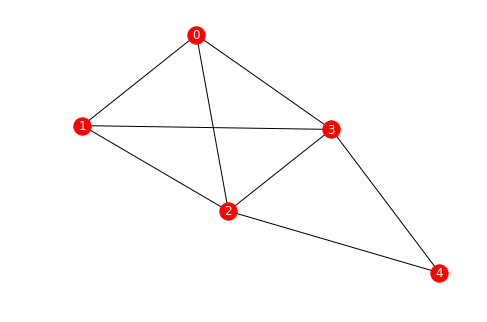

In [29]:
G = networkx.house_x_graph()
networkx.draw(G, with_labels=True, font_color='w')
print networkx.radius(G), networkx.diameter(G), networkx.center(G)

Клика это полный подграф

In [30]:
G = networkx.house_x_graph()
print list(networkx.clique.enumerate_all_cliques(G))

[[0], [1], [2], [3], [4], [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [2, 4], [3, 4], [0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3], [2, 3, 4], [0, 1, 2, 3]]


Мост и шарнир это, соответственно, ребро и вершина, при удалении которых из графа число его компонент связности возрастает.

Мосты: [(4, 6)]
Шарниры: [6, 4, 2]


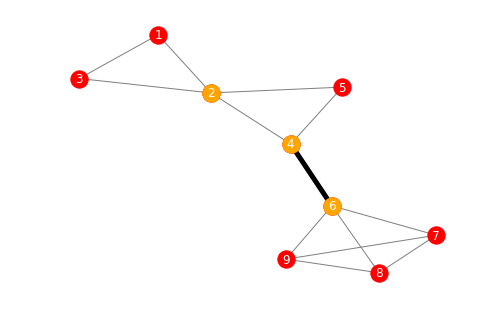

In [31]:
G = networkx.from_edgelist([(1,2),(2,3),(3,1), (2,4),(4,5),(5,2), (4,6), (6,7),(7,8),(8,6),(8,9),(7,9),(6,9)])
pos = networkx.nx_pydot.graphviz_layout(G)

bridges = list(networkx.bridges(G))
articulation_points = list(networkx.articulation_points(G))

print 'Мосты:', bridges
print 'Шарниры:', articulation_points

networkx.draw(G, pos=pos, with_labels=True, font_color='w', edge_color='gray')
networkx.draw_networkx_edges(G, pos=pos, edgelist=bridges, width=5, edge_color='k')
networkx.draw_networkx_nodes(G, pos=pos, nodelist=articulation_points, node_color='orange');

Граф можно разложить на базисные циклы

In [32]:
networkx.cycle_basis(G)

[[2, 3, 1], [4, 5, 2], [8, 7, 6], [9, 7, 6], [8, 9, 6]]

Максимальный поток минимальной стоимости

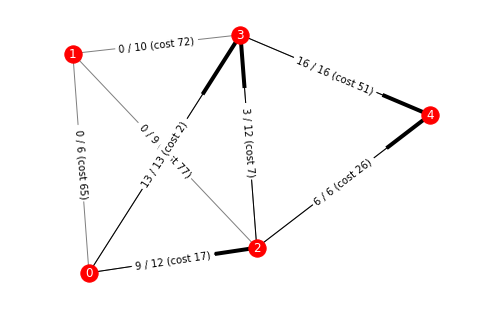

In [33]:
seed(1)
G = networkx.house_x_graph()
capacity = list(random.randint(1, 20, (G.number_of_edges(),), dtype=int))
networkx.set_edge_attributes(G, dict(zip(G.edges(), capacity)), 'capacity')
cost = list(random.randint(1, 100, (G.number_of_edges(),), dtype=int))
networkx.set_edge_attributes(G, dict(zip(G.edges(), cost)), 'weight')

flow = networkx.max_flow_min_cost(G, 0, 4)
DG = networkx.DiGraph()
DG.add_edges_from([(u,v) for u in flow for v in flow[u] if flow[u][v]])
edge_labels = {(u,v): '%d / %d (cost %d)' % (
    flow[u][v] + flow[v][u], G.edges()[(u,v)]['capacity'], G.edges()[(u,v)]['weight']) for (u,v) in G.edges()}

pos = networkx.nx_pydot.graphviz_layout(G)
networkx.draw(G, pos, with_labels=True, font_color='w', edge_color='gray')
networkx.draw_networkx_edges(DG, pos)
networkx.draw_networkx_edge_labels(G, pos, edge_labels);

Топологическая сортировка ациклического орграфа

In [34]:
list(networkx.topological_sort(DG))

[0, 2, 3, 4]

Алгоритм PageRank

In [35]:
networkx.pagerank(DG)

{0: 0.1284148072693334,
 2: 0.18299091153140434,
 3: 0.26076167126881566,
 4: 0.42783260993044653}

## Метрики вершин

В анализе сетей часто используют метрики центральности, числа, выражающие, насколько та или иная вершина или ребро «важны» в сети. Например, closeness centrality вершины это обратное от средней длины кратчайшего расстояния до других вершин. В треугольной сетке 4&times;5 от вершины (0,0) 2 других вершины расположены на расстоянии 1, 4 — 2, 5 — 3, 5 — 4, 1 — 5. Сумма расстояний до 17 вершин равна 50, closeness centrality = 17/50.

In [36]:
G = networkx.triangular_lattice_graph(4, 5)
print networkx.closeness_centrality(G)[(0,0)]

0.34


При нужде вершины могут быть переименованы согласно нумерации с 0.

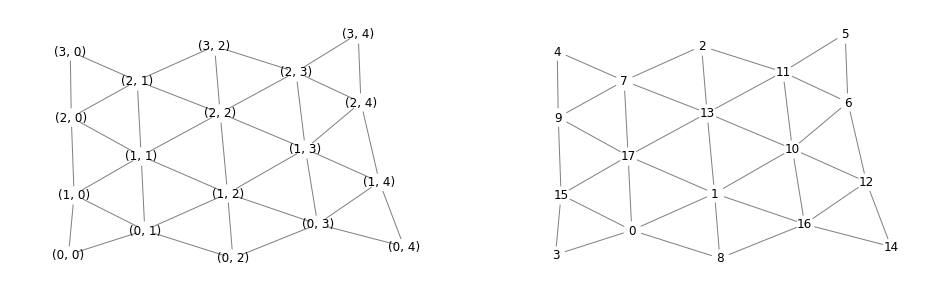

In [37]:
figure(figsize=(16,5))
subplot(121)
pos = networkx.nx_pydot.graphviz_layout(G, prog='sfdp')
networkx.draw(G, pos, with_labels=True, node_color='w', edge_color='gray')

subplot(122)
G2 = networkx.convert_node_labels_to_integers(G)
pos = networkx.nx_pydot.graphviz_layout(G2, prog='sfdp')
networkx.draw(G2, pos, with_labels=True, node_color='w', edge_color='gray')

In [38]:
metrics = {k: v for k, v in networkx.__dict__.items() if 'centrality' in k}

table = {}
for k, metric in metrics.items():
    result = trydefault(lambda: metric(G))
    if result and type(result) == dict and set(result.keys()) == set(list(G.nodes())):
        table[k] = {'-'.join(map(str, k)):v for k,v in result.items()}

import pandas
df = pandas.DataFrame(table)
IPython.display.HTML(df.T.to_html(float_format='%.2f'))

,0-0,0-1,0-2,0-3,0-4,1-0,1-1,1-2,1-3,1-4,2-0,2-1,2-2,2-3,2-4,3-0,3-2,3-4
approximate_current_flow_betweenness_centrality,0.03,0.20,0.11,0.18,0.05,0.15,0.27,0.25,0.33,0.15,0.16,0.23,0.35,0.29,0.21,0.05,0.18,0.06
betweenness_centrality,0.00,0.12,0.03,0.12,0.00,0.04,0.18,0.23,0.18,0.04,0.04,0.12,0.23,0.12,0.04,0.00,0.03,0.00
betweenness_centrality_source,0.00,0.12,0.03,0.12,0.00,0.04,0.18,0.23,0.18,0.04,0.04,0.12,0.23,0.12,0.04,0.00,0.03,0.00
closeness_centrality,0.34,0.46,0.42,0.46,0.34,0.40,0.53,0.57,0.53,0.40,0.40,0.46,0.57,0.46,0.40,0.34,0.42,0.34
communicability_betweenness_centrality,0.03,0.24,0.11,0.24,0.03,0.14,0.38,0.42,0.38,0.14,0.14,0.24,0.42,0.24,0.14,0.03,0.11,0.03
current_flow_betweenness_centrality,0.05,0.23,0.12,0.23,0.05,0.16,0.27,0.28,0.27,0.16,0.16,0.23,0.28,0.23,0.16,0.05,0.12,0.05
current_flow_closeness_centrality,0.05,0.08,0.07,0.08,0.05,0.07,0.09,0.10,0.09,0.07,0.07,0.08,0.10,0.08,0.07,0.05,0.07,0.05
degree_centrality,0.12,0.29,0.18,0.29,0.12,0.24,0.35,0.35,0.35,0.24,0.24,0.29,0.35,0.29,0.24,0.12,0.18,0.12
eigenvector_centrality,0.09,0.25,0.19,0.25,0.09,0.19,0.34,0.37,0.34,0.19,0.19,0.25,0.37,0.25,0.19,0.09,0.19,0.09
eigenvector_centrality_numpy,0.09,0.25,0.19,0.25,0.09,0.19,0.34,0.37,0.34,0.19,0.19,0.25,0.37,0.25,0.19,0.09,0.19,0.09


## Алгоритм Катхилла-Макки

Алгоритм Катхилла-Макки умеет переставлять колонки матрицы корреляции, чтобы сильно коррелирующие колонки оказывались рядом.

[1, 4, 10, 14, 0, 3, 6, 5, 9, 8, 13, 11, 2]


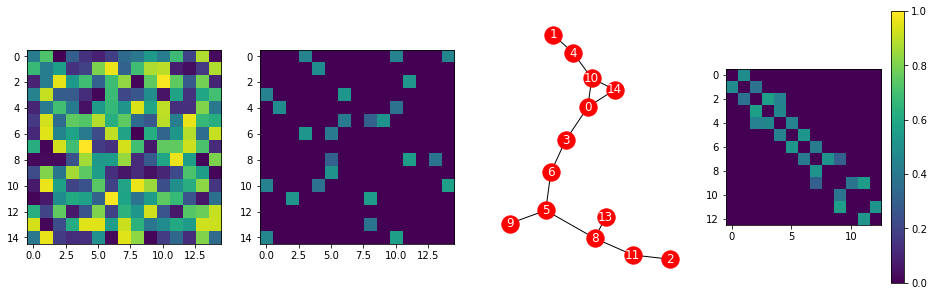

In [39]:
seed(1)
N = 15
A = rand(N, N)
CA = corrcoef(A)

G = networkx.Graph()
for i in range(CA.shape[0]):
    for j in range(i + 1, CA.shape[1]):
        if CA[i,j] > 0.3:
            G.add_edge(i, j, weight=CA[i,j])

reorder = list(networkx.utils.cuthill_mckee_ordering(G))
print reorder

figure(figsize=(16,5))
subplot(141)
imshow(A)
subplot(142)
imshow((CA > 0.3) * CA * (1 - eye(N)), vmin=0, vmax=1);
subplot(143)
networkx.draw(G, with_labels=True, node_color='r', font_color='w')
subplot(144)
imshow(networkx.adjacency_matrix(G, nodelist=reorder).todense(), vmin=0, vmax=1)
colorbar();